<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN

## Preparación de ambiente

### Carga de módulos

In [ ]:
import numpy as np
import pandas as pd
import cufflinks as cf
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

cf.go_offline()
pd.set_option("display.max_rows", 150)
pd.set_option("display.max_columns", 150)
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

## Data Wrangling

### Lectura de datos

In [ ]:
df = pd.read_csv("./fifa/players_20.csv")

In [ ]:
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,"195,800,000.00","#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.00,NaN,2004-07-01,"2,021.00",NaN,nan,87.00,92.00,92.00,96.00,39.00,66.00,nan,nan,nan,nan,nan,nan,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,"96,500,000.00","#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.00,NaN,2018-07-10,"2,022.00",LS,7.00,90.00,93.00,82.00,89.00,35.00,78.00,nan,nan,nan,nan,nan,nan,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,"195,200,000.00","#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.00,NaN,2017-08-03,"2,022.00",LW,10.00,91.00,85.00,87.00,95.00,32.00,58.00,nan,nan,nan,nan,nan,nan,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,"164,700,000.00",NaN,GK,13.00,NaN,2014-07-16,"2,023.00",GK,1.00,nan,nan,nan,nan,nan,nan,87.00,92.00,78.00,89.00,52.00,90.00,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,"

### EDA

In [ ]:
df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,"195,800,000.00","#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.00,NaN,2004-07-01,"2,021.00",NaN,nan,87.00,92.00,92.00,96.00,39.00,66.00,nan,nan,nan,nan,nan,nan,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,"96,500,000.00","#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.00,NaN,2018-07-10,"2,022.00",LS,7.00,90.00,93.00,82.00,89.00,35.00,78.00,nan,nan,nan,nan,nan,nan,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,"195,200,000.00","#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.00,NaN,2017-08-03,"2,022.00",LW,10.00,91.00,85.00,87.00,95.00,32.00,58.00,nan,nan,nan,nan,nan,nan,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,"164,700,000.00",NaN,GK,13.00,NaN,2014-07-16,"2,023.00",GK,1.00,nan,nan,nan,nan,nan,nan,87.00,92.00,78.00,89.00,52.00,90.00,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,"

In [ ]:
df = df[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

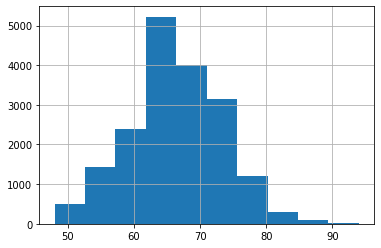

In [ ]:
df["overall"].hist()

In [ ]:
df = df[df["overall"] > 86].reset_index(drop = True)

In [ ]:
df = df.fillna(df.mean())

In [ ]:
df

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,4,"195,800,000.00",10.00,"2,021.00",87.00,92.00,92.00,96.00,39.00,66.00,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,5,"96,500,000.00",7.00,"2,022.00",90.00,93.00,82.00,89.00,35.00,78.00,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,5,"195,200,000.00",10.00,"2,022.00",91.00,85.00,87.00,95.00,32.00,58.00,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,1,"164,700,000.00",13.00,"2,023.00",75.49,74.67,78.84,81.98,61.33,73.78,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,4,"184,500,000.00",7.00,"2,024.00",91.00,83.00,86.00,94.00,35.00,66.00,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
5,K. De Bruyne,28,181,70,91,91,90000000,370000,4,5,4,"166,500,000.00",17.00,"2,023.00",76.00,86.00,92.00,86.00,61.00,78.00,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13
6,M. ter Stegen,27,187,85,90,93,67500000,250000,3,4,1,"143,400,000.00",1.00,"2,022.00",75.49,74.67,78.84,81.98,61.33,73.78,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90
7,V. van Dijk,27,193,92,90,91,78000000,200000,3,3,2,"150,200,000.00",4.00,"2,023.00",77.00,60.00,70.00,71.00,90.00,86.00,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11
8,L. Modrić,33,172,66,90,90,45000000,340000,4,4,4,"92,300,000.00",10.00,"2,020.00",74.00,76.00,89.00,89.00,72.00,66.00,86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,13,9,7,14,9
9,M. Salah,27,175,71,90,90,80500000,240000,3,3,4,"148,900,000.00",11.00,"2,023.00",93.00,86.00,81.00,89.00,45.00,74.00,79,90,59,84,79,89,83,69,75,89,94,92,91,92,88,80,69,85,73,84,63,55,92,84,77,91,38,43,41,14,14,9,11,14


In [ ]:
df.set_index("short_name", inplace=True)

In [ ]:
df

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
short_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
L. Messi,32,170,72,94,94,95500000,565000,5,4,4,"195,800,000.00",10.00,"2,021.00",87.00,92.00,92.00,96.00,39.00,66.00,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,5,"96,500,000.00",7.00,"2,022.00",90.00,93.00,82.00,89.00,35.00,78.00,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
Neymar Jr,27,175,68,92,92,105500000,290000,5,5,5,"195,200,000.00",10.00,"2,022.00",91.00,85.00,87.00,95.00,32.00,58.00,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
J. Oblak,26,188,87,91,93,77500000,125000,3,3,1,"164,700,000.00",13.00,"2,023.00",75.49,74.67,78.84,81.98,61.33,73.78,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
E. Hazard,28,175,74,91,91,90000000,470000,4,4,4,"184,500,000.00",7.00,"2,024.00",91.00,83.00,86.00,94.00,35.00,66.00,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
K. De Bruyne,28,181,70,91,91,90000000,370000,4,5,4,"166,500,000.00",17.00,"2,023.00",76.00,86.00,92.00,86.00,61.00,78.00,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13
M. ter Stegen,27,187,85,90,93,67500000,250000,3,4,1,"143,400,000.00",1.00,"2,022.00",75.49,74.67,78.84,81.98,61.33,73.78,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90
V. van Dijk,27,193,92,90,91,78000000,200000,3,3,2,"150,200,000.00",4.00,"2,023.00",77.00,60.00,70.00,71.00,90.00,86.00,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11
L. Modrić,33,172,66,90,90,45000000,340000,4,4,4,"92,300,000.00",10.00,"2,020.00",74.00,76.00,89.00,89.00,72.00,66.00,86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,13,9,7,14,9


### Escalamiento

In [ ]:
scaler = MinMaxScaler()

In [ ]:
Xs = pd.DataFrame(data=scaler.fit_transform(df), columns=df.columns, index=df.index)

In [ ]:
Xs.shape

(55, 53)

### Reducción de dimensiones

In [ ]:
pca = PCA(n_components=3)

In [ ]:
Xp = pd.DataFrame(data=pca.fit_transform(Xs), columns=["p1", "p2", "p3"], index=Xs.index)

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.51800866, 0.73572561, 0.79289462])

In [ ]:
Xp.iplot(kind="scatter", mode="markers", x="p1", y="p2")

## Modelado

### DBSCAN

#### Entrenamiento inicial

In [ ]:
cluster = DBSCAN(eps=1, min_samples=5)

In [ ]:
Xp["cl"] = [str(x) for x in cluster.fit_predict(Xp[["p1", "p2", "p3"]])]

#### Visualización de resultados

In [ ]:
Xp.reset_index().iplot(kind="scatter", mode="markers", x="p1", y="p2", categories="cl", text="short_name")

/home/oscar/VirtualEnvs/Python 3/lib/python3.7/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/oscar/VirtualEnvs/Python 3/lib/python3.7/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [ ]:
tsne?

Object `tsne` not found.


In [ ]:
tsne = TSNE(n_components=2, perplexity=20)

In [ ]:
Xt = pd.DataFrame(data=tsne.fit_transform(Xs), columns=["d1", "d2"], index=Xs.index)

In [ ]:
Xt.iplot(kind="scatter", mode="markers", x="d1", y="d2")

In [ ]:
Xt["cl"] = Xp["cl"]

In [ ]:
Xt.iplot(kind="scatter", mode="markers", x="d1", y="d2", categories="cl")

/home/oscar/VirtualEnvs/Python 3/lib/python3.7/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/oscar/VirtualEnvs/Python 3/lib/python3.7/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



#### Cálculo de parámetros 'óptimos'

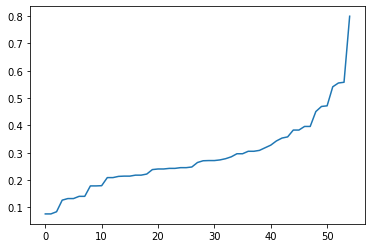

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# calculate the distance from each point to its closest neighbor
nn = NearestNeighbors(n_neighbors = 2)

# fit the nearest neighbor
nbrs = nn.fit(Xp)

# returns two arrays - distance to the closest n_neighbors points and index for each point
distances, indices = nbrs.kneighbors(Xp)

# sort the distance and plot it
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
np.log(Xp.shape[0])

4.007333185232471

#### Entrenamiento con parámetros ajustados

In [ ]:
cluster = DBSCAN(n_jobs=-1, eps=0.3, min_samples=4)

In [ ]:
Xp["cl"] = [str(x) for x in cluster.fit_predict(Xp[["p1", "p2"]])]

In [ ]:
Xp.reset_index().iplot(kind="scatter", mode="markers", x="p1", y="p2", categories="cl", text="short_name")

/home/oscar/VirtualEnvs/Python 3/lib/python3.7/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/oscar/VirtualEnvs/Python 3/lib/python3.7/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [ ]:
df["cl"] = Xp["cl"]

### Perfilamiento

In [ ]:
df.groupby("cl").mean().style.background_gradient(cmap='Blues')

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
cl,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,30.857143,182.142857,80.000000,88.285714,88.714286,44142857.142857,202142.857143,3.285714,3.142857,2.142857,83042857.142857,9.285714,2022.000000,69.641270,58.666667,71.834921,73.568254,80.761905,78.682540,55.857143,45.714286,63.714286,73.142857,45.142857,61.857143,52.000000,45.428571,69.142857,68.000000,66.000000,67.000000,63.428571,85.285714,62.142857,67.714286,75.142857,71.571429,78.714286,48.714286,74.000000,76.571429,50.428571,63.000000,48.857143,81.714286,76.571429,74.857143,72.428571,20.285714,20.714286,18.428571,18.714286,20.714286
0,28.291667,177.500000,73.291667,89.000000,89.791667,68020833.333333,269375.000000,3.625000,3.875000,4.041667,128304166.666667,12.250000,2022.083333,83.916667,84.583333,82.333333,88.375000,43.166667,68.833333,80.333333,85.916667,66.791667,85.125000,81.875000,88.250000,83.333333,77.000000,76.333333,89.750000,85.625000,82.500000,86.875000,89.458333,83.625000,83.416667,69.750000,81.791667,65.625000,83.416667,60.250000,41.083333,89.041667,85.041667,78.916667,87.708333,42.958333,39.958333,33.458333,10.958333,10.958333,11.375000,11.083333,11.083333
1,28.444444,190.111111,86.777778,88.666667,90.000000,51111111.111111,183888.888889,3.444444,2.888889,1.000000,102133333.333333,7.000000,2022.222222,75.488889,74.666667,78.844444,81.977778,61.333333,73.777778,15.333333,13.000000,15.444444,47.000000,13.666667,18.888889,15.666667,15.444444,48.111111,32.222222,53.000000,56.111111,54.888889,85.888889,46.111111,61.000000,70.555556,39.222222,70.000000,14.000000,32.777778,22.333333,13.111111,60.888889,27.111111,67.666667,23.888889,14.666667,13.777778,87.444444,85.111111,81.222222,86.111111,89.222222
2,30.363636,187.454545,83.090909,87.727273,88.272727,42272727.272727,208636.363636,3.363636,3.090909,2.454545,82000000.000000,8.636364,2021.363636,61.727273,61.545455,74.181818,72.000000,87.090909,81.181818,62.000000,56.454545,80.818182,81.727273,54.636364,68.636364,64.363636,65.545455,81.454545,79.909091,59.090909,63.818182,63.909091,86.363636,58.454545,74.545455,81.272727,76.818182,83.272727,61.545455,81.818182,88.454545,61.181818,72.090909,63.636364,86.181818,88.272727,88.090909,85.545455,10.909091,9.727273,10.272727,11.181818,9.454545
3,29.750000,180.500000,74.250000,88.250000,89.000000,53625000.000000,241250.000000,3.750000,3.750000,4.250000,101250000.000000,7.750000,2020.500000,73.000000,79.250000,83.000000,85.750000,65.500000,74.500000,78.500000,76.000000,68.250000,86.500000,84.000000,85.750000,83.000000,78.250000,79.250000,88.500000,73.500000,72.500000,83.000000,87.000000,76.500000,83.250000,78.500000,84.500000,71.250000,80.500000,70.000000,70.750000,83.500000,85.500000,81.250000,86.500000,63.750000,64.500000,61.500000,9.000000,7.750000,7.250000,10.000000,8.750000


In [ ]:
df

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,cl
short_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
L. Messi,32,170,72,94,94,95500000,565000,5,4,4,"195,800,000.00",10.00,"2,021.00",87.00,92.00,92.00,96.00,39.00,66.00,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,0
Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,5,"96,500,000.00",7.00,"2,022.00",90.00,93.00,82.00,89.00,35.00,78.00,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,0
Neymar Jr,27,175,68,92,92,105500000,290000,5,5,5,"195,200,000.00",10.00,"2,022.00",91.00,85.00,87.00,95.00,32.00,58.00,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,0
J. Oblak,26,188,87,91,93,77500000,125000,3,3,1,"164,700,000.00",13.00,"2,023.00",75.49,74.67,78.84,81.98,61.33,73.78,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,1
E. Hazard,28,175,74,91,91,90000000,470000,4,4,4,"184,500,000.00",7.00,"2,024.00",91.00,83.00,86.00,94.00,35.00,66.00,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,0
K. De Bruyne,28,181,70,91,91,90000000,370000,4,5,4,"166,500,000.00",17.00,"2,023.00",76.00,86.00,92.00,86.00,61.00,78.00,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13,0
M. ter Stegen,27,187,85,90,93,67500000,250000,3,4,1,"143,400,000.00",1.00,"2,022.00",75.49,74.67,78.84,81.98,61.33,73.78,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,1
V. van Dijk,27,193,92,90,91,78000000,200000,3,3,2,"150,200,000.00",4.00,"2,023.00",77.00,60.00,70.00,71.00,90.00,86.00,53,52,86,78,45,70,60,70,81,76,74,79,61,88,53,81,90,75,92,64,82,89,47,65,62,89,91,92,85,13,10,13,11,11,2
L. Modrić,33,172,66,90,90,45000000,340000,4,4,4,"92,300,000.00",10.00,"2,020.00",74.00,76.00,89.00,89.00,72.00,66.00,86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,13,9,7,14,9,3


In [ ]:
df["height_cm"].describe()

count    55.00
mean    182.36
std       8.04
min     163.00
25%     175.00
50%     184.00
75%     188.00
max     199.00
Name: height_cm, dtype: float64

In [ ]:
df.mean()

age                                   29.16
height_cm                            182.36
weight_kg                             78.38
overall                               88.55
potential                             89.33
value_eur                     56,018,181.82
wage_eur                         232,636.36
international_reputation               3.51
weak_foot                              3.45
skill_moves                            3.00
release_clause_eur           107,032,727.27
team_jersey_number                     9.96
contract_valid_until               2,021.84
pace                                  75.49
shooting                              74.67
passing                               78.84
dribbling                             81.98
defending                             61.33
physic                                73.78
attacking_crossing                    62.78
attacking_finishing                   62.25
attacking_heading_accuracy            60.91
attacking_short_passing         